Analisis de Datos del Grupo B
Universidad de Comahue y Universidad del Salvador

In [1]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

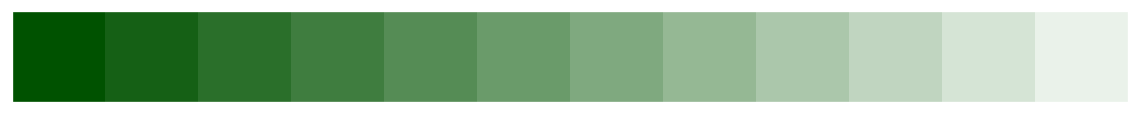

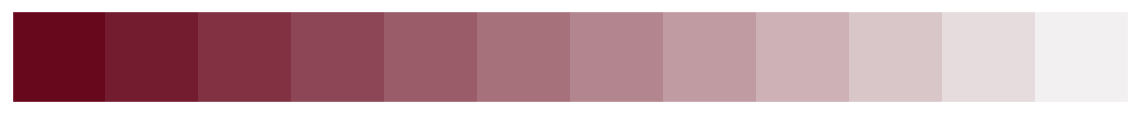

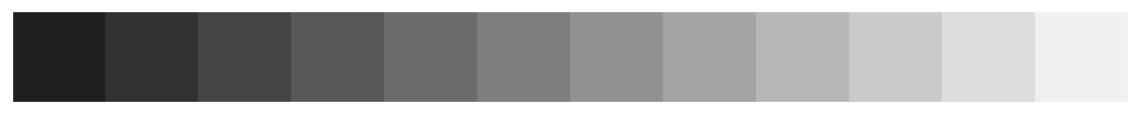

In [2]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

In [3]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoB_comahue_universidad'
university1_name = 'Universidad de Comahue'

university2 = 'GrupoB_salvador_universidad'
university2_name = 'Universidad del Salvador'


In [5]:
df_1 = pd.read_csv(f'datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'datasets/{university2}_process.txt', sep='\t')


In [6]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [7]:
df_2.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [9]:
df_geonames = pd.read_csv('AR_geonames.txt', sep='\t', header=None,on_bad_lines='skip')

In [10]:
df_geonames.dropna(axis=1, inplace=True)

In [11]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [12]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')


In [ ]:
df_1geonames_merge

TOP 10 de carreras con más alumnos y con menos alumnos

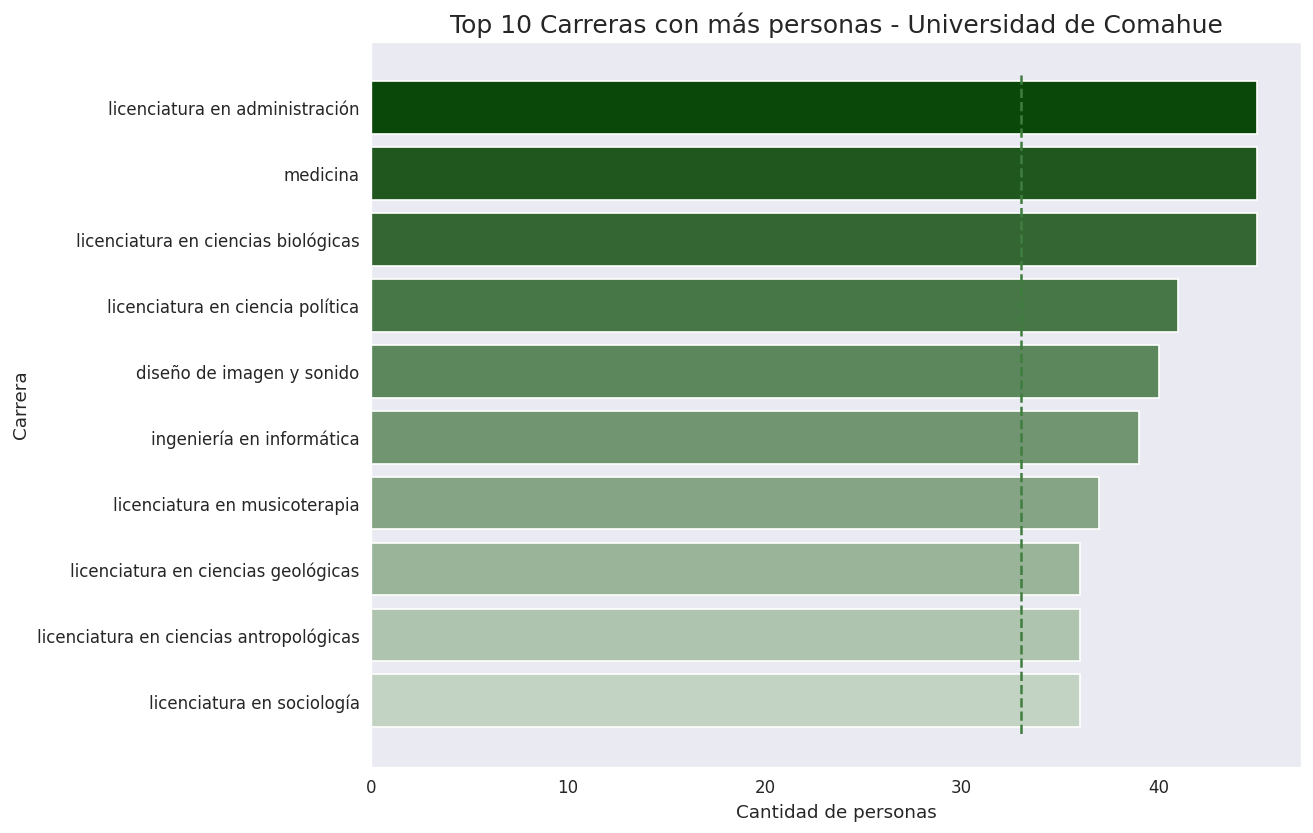

In [14]:


df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

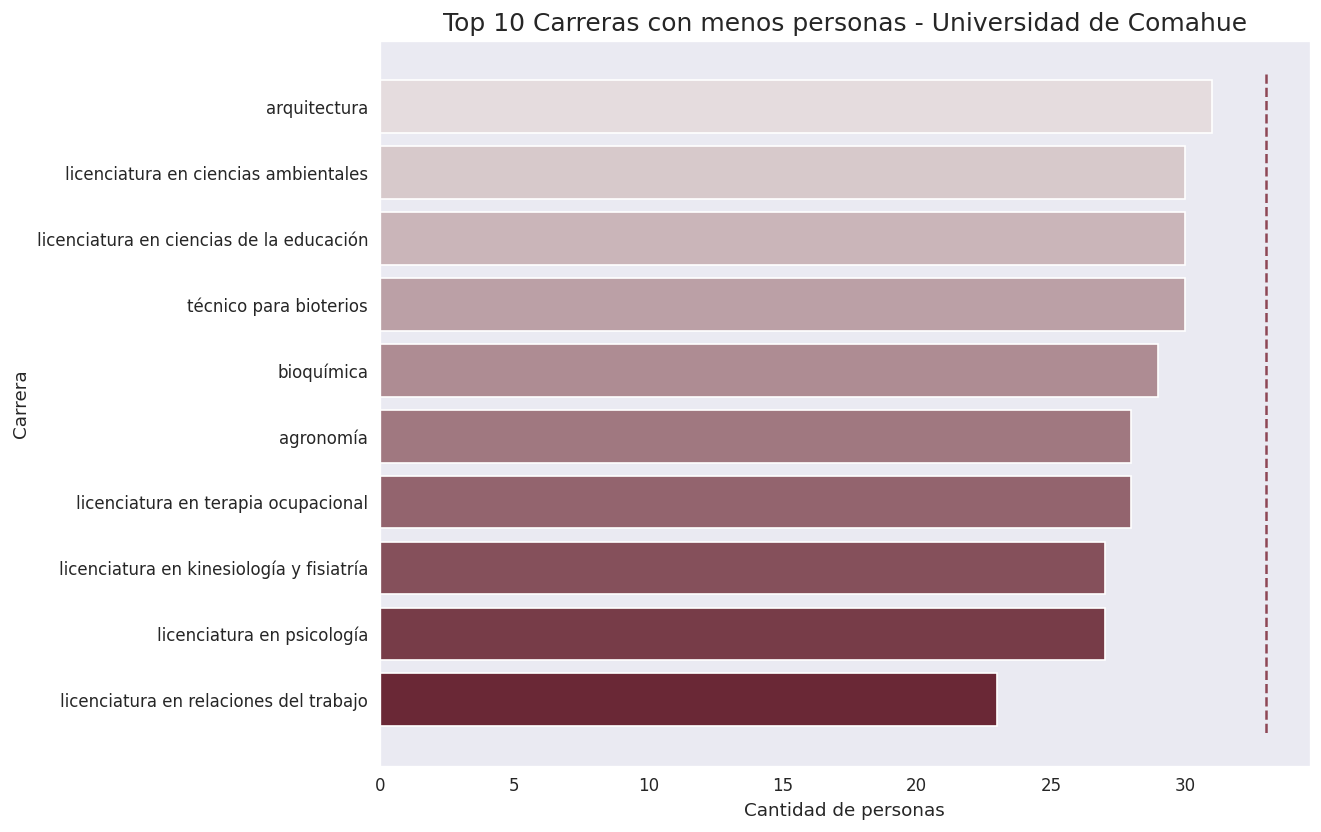

In [15]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()


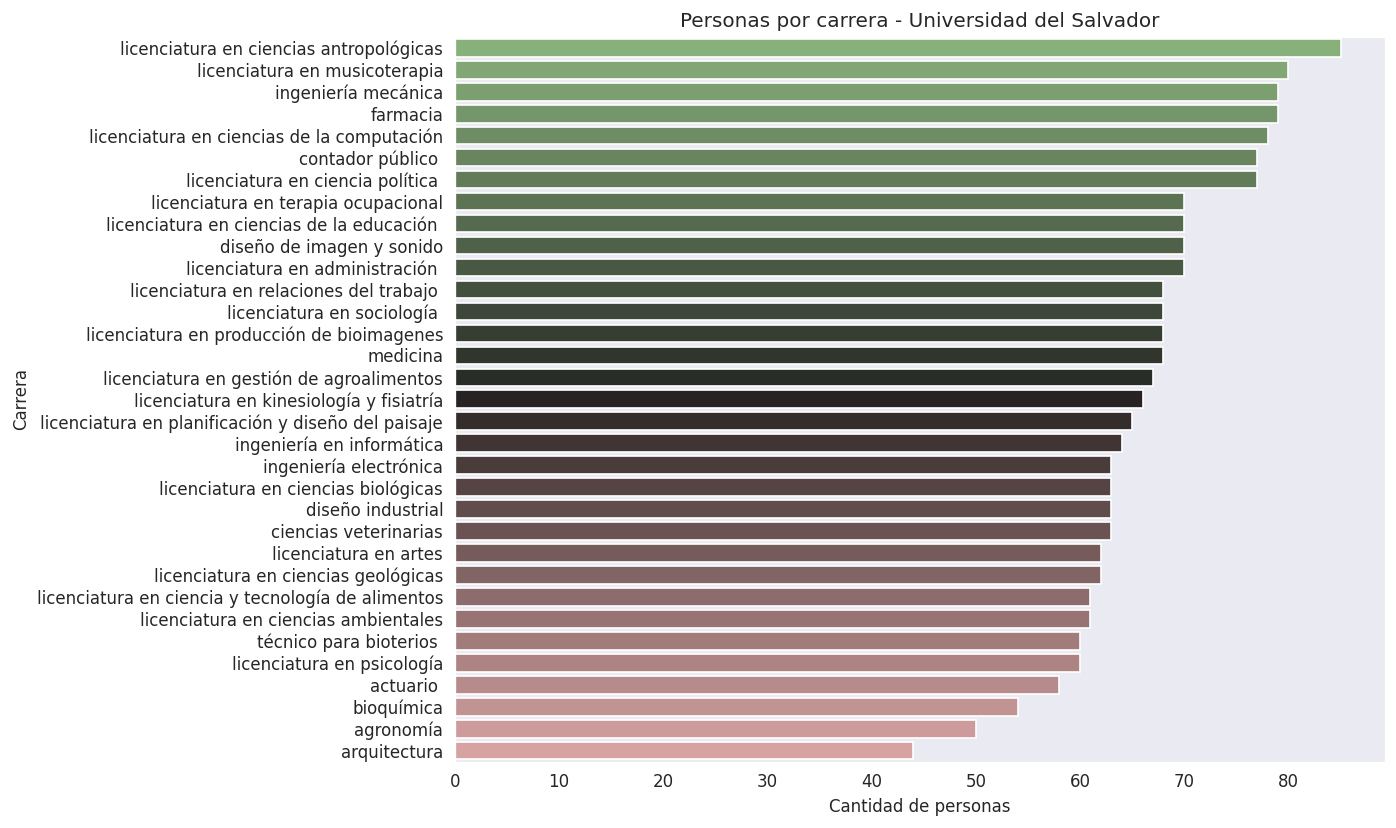

In [16]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()


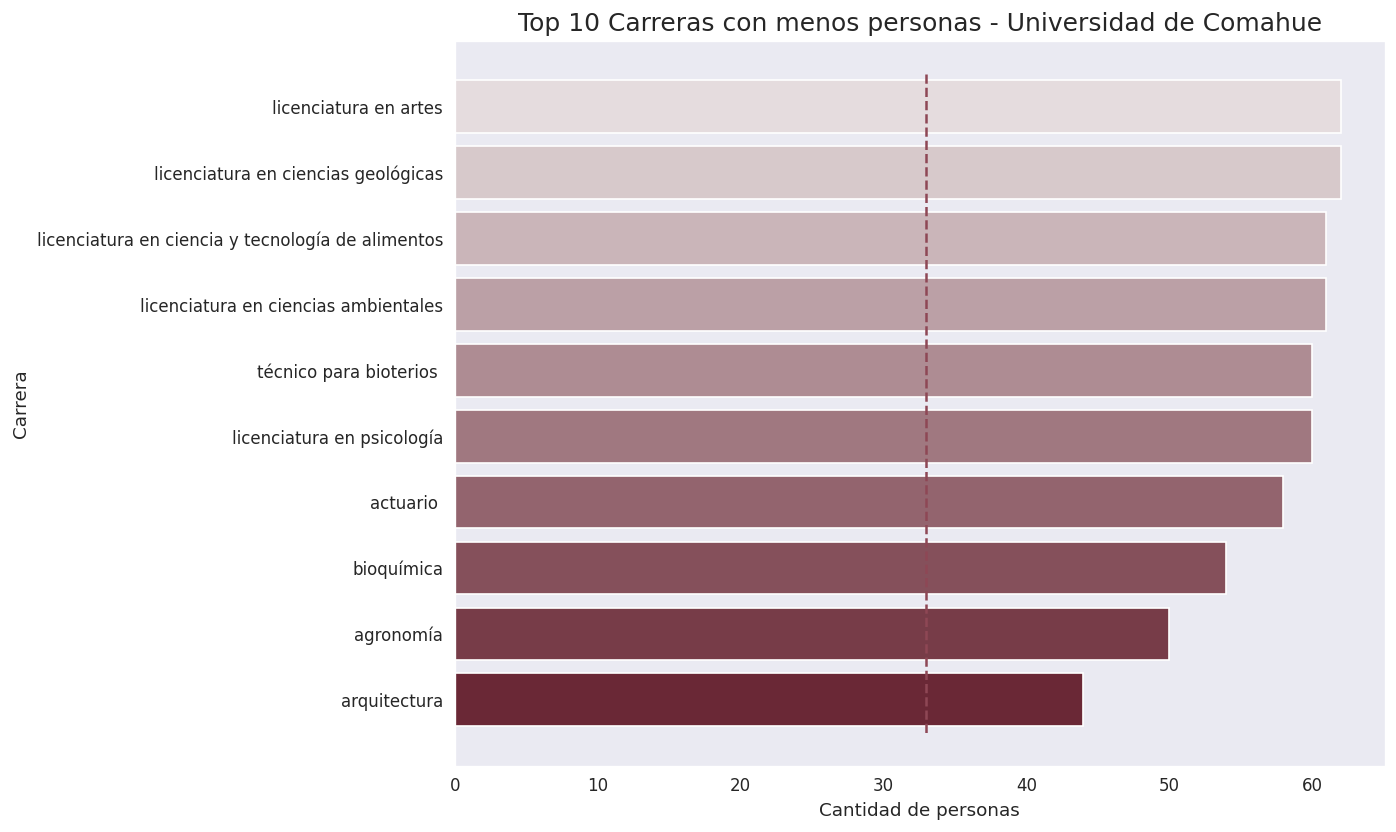

In [17]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()


In [18]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [19]:
df_1.shape

(1119, 9)

In [20]:
df_1.head()


,university,career,inscription_date,first_name,gender,age,postal_code,location,email
0,univ. nacional del comahue,contador público,2020-10-31,amanda hill,female,32,8129,17 de agosto,tyler57@hotmail.com
1,univ. nacional del comahue,agronomía,2021-01-31,ryan davis,male,87,3328,colonia japonesa,patriciazamora@gmail.com
2,univ. nacional del comahue,diseño industrial,2020-12-03,sandra burton,female,52,4500,alto del saladillo,kleinlauren@gmail.com
3,univ. nacional del comahue,licenciatura en ciencias geológicas,2020-11-24,rebekah gonzales,female,43,7609,balneario la caleta,mterry@yahoo.com
4,univ. nacional del comahue,licenciatura en gestión de agroalimentos,2020-10-23,laura gibson,female,84,3087,felicia,carmenmckinney@yahoo.com


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1119 non-null   object
 1   career            1119 non-null   object
 2   inscription_date  1119 non-null   object
 3   first_name        1119 non-null   object
 4   gender            1119 non-null   object
 5   age               1119 non-null   int64 
 6   postal_code       1119 non-null   int64 
 7   location          1119 non-null   object
 8   email             1119 non-null   object
dtypes: int64(2), object(7)
memory usage: 78.8+ KB


In [22]:
df_2.describe()

,age,postal_code
count,2193.000000,2193.000000
mean,24.384405,4828.636115
std,7.350547,2125.643950
min,19.000000,1602.000000
25%,21.000000,3105.000000
50%,21.000000,4701.000000
75%,21.000000,6441.000000
max,50.000000,9421.000000


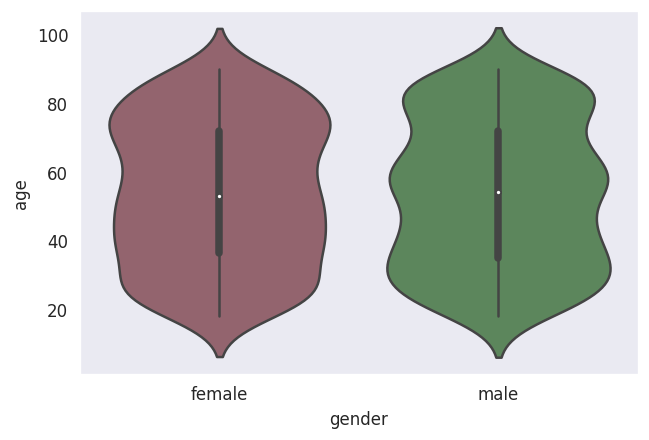

In [23]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

**Top 10 localidades por alumnos**


In [24]:
df_1.location.value_counts().head(10)

9 de julio               7
25 de mayo               7
agua colorada            6
arroyo burgos            5
colonia lia y allende    5
gobernador moyano        5
baldes de pacheco        4
general galarza          4
colonia bella vista      4
dique toma               4
Name: location, dtype: int64

In [25]:
df_2.location.value_counts().head(10)

agua colorada    50
25 de mayo       45
9 de julio       36
algarrobo        24
alpachiri        20
agua blanca      15
alegria          14
buena vista      12
alto verde       12
caraguatay       12
Name: location, dtype: int64

**Distribucion de alumnos por edad y género**

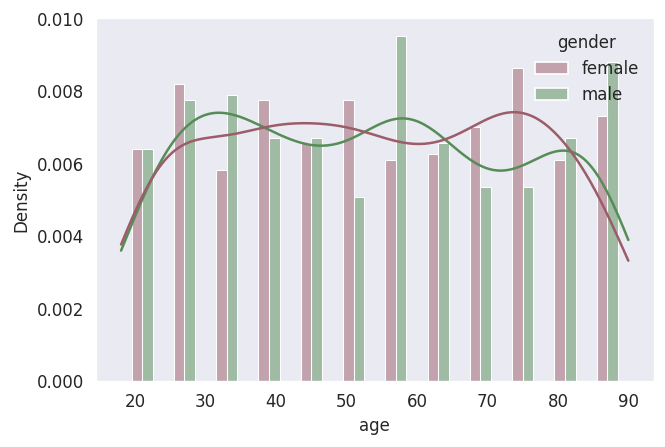

In [26]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])



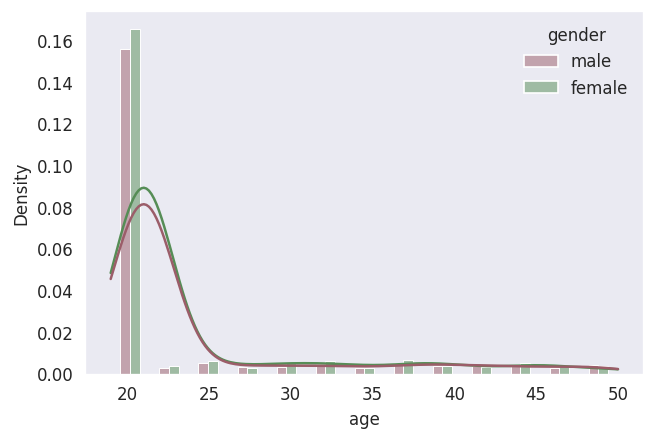

In [28]:
sns.histplot(data=df_2,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


In [27]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)


Segregación por tipo de carrera


In [29]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)

Proporción de alumnos por tipo de carrera y género

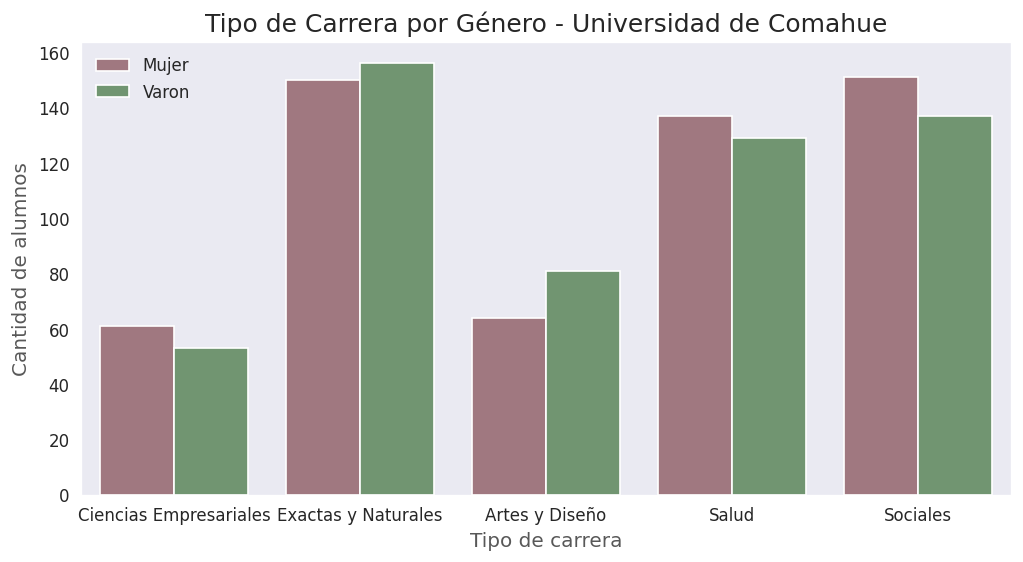

In [30]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

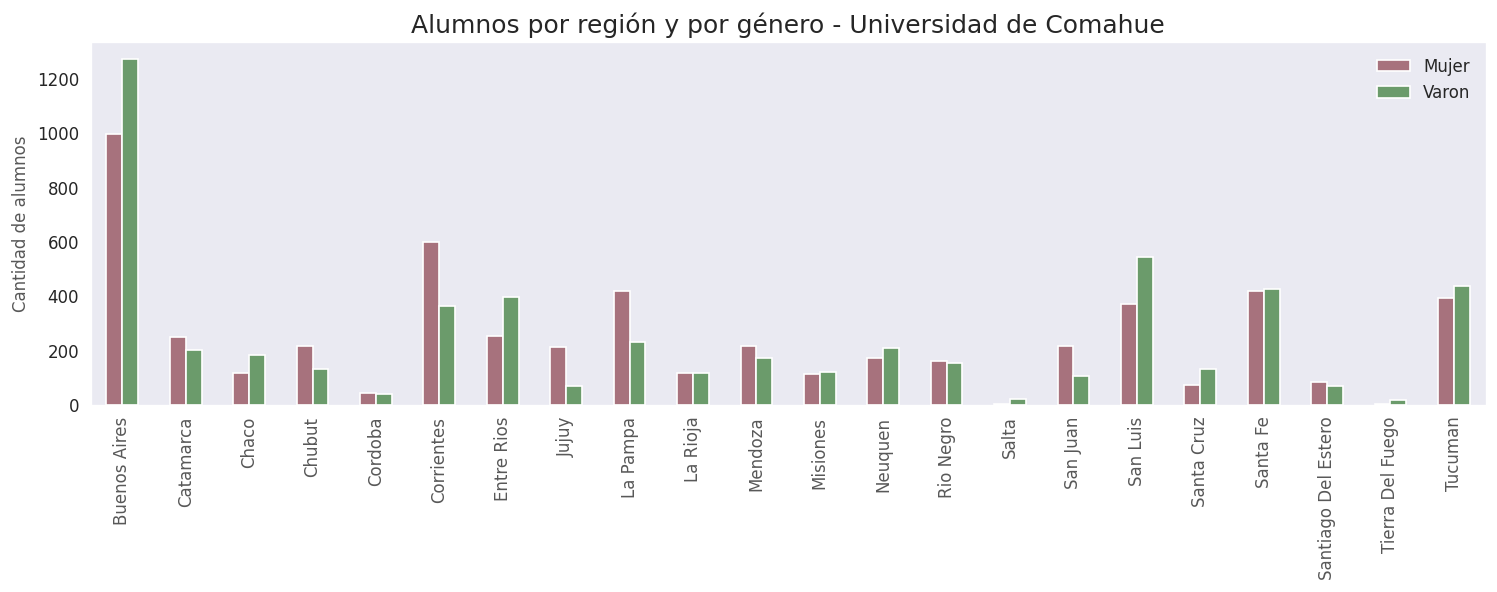

In [31]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()


In [35]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_2['tipo_career'] = df_1.career.apply(clasificador)

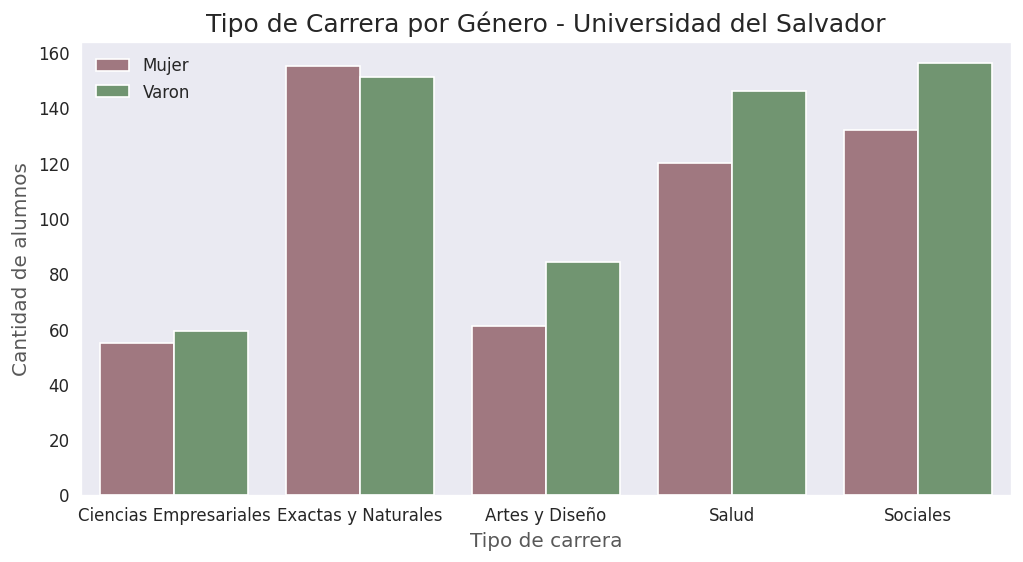

In [36]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

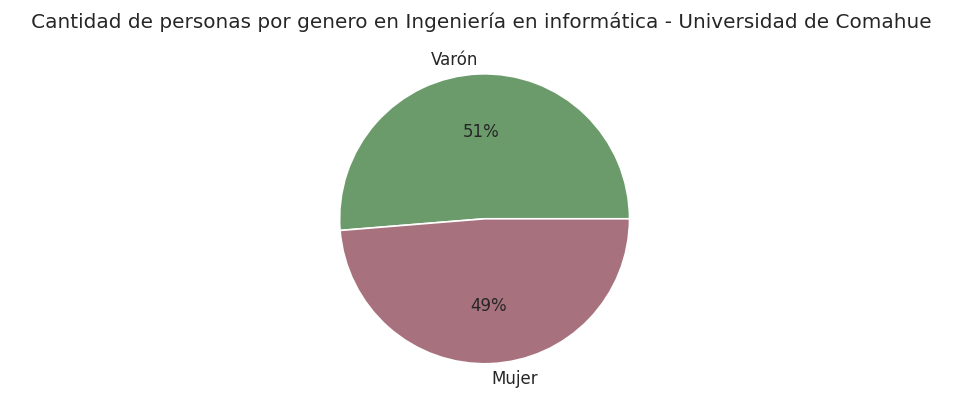

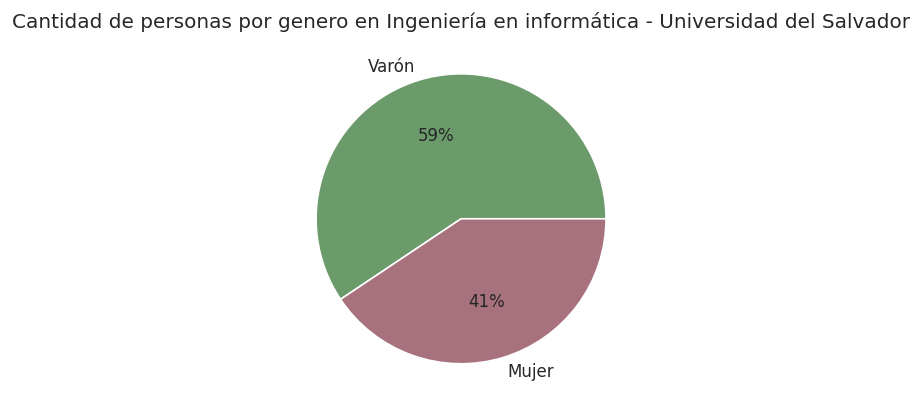

In [38]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


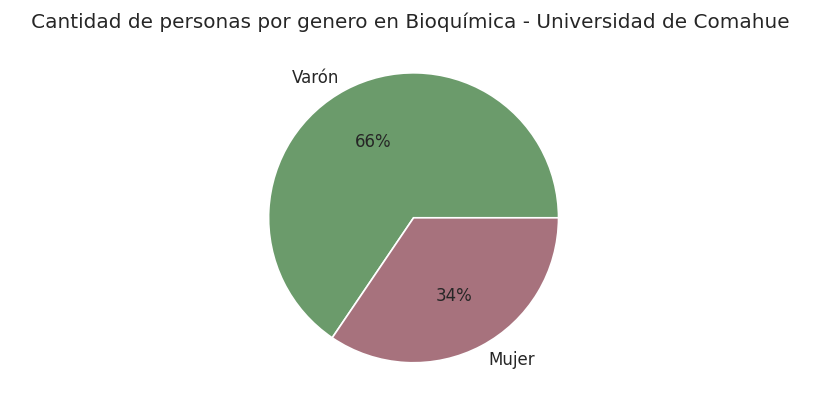

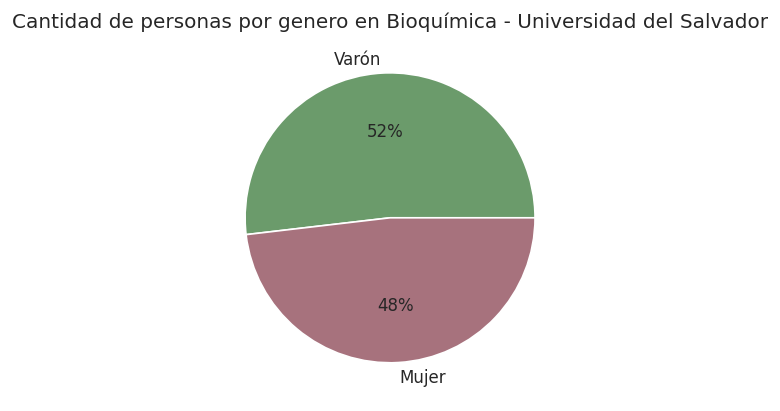

In [39]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


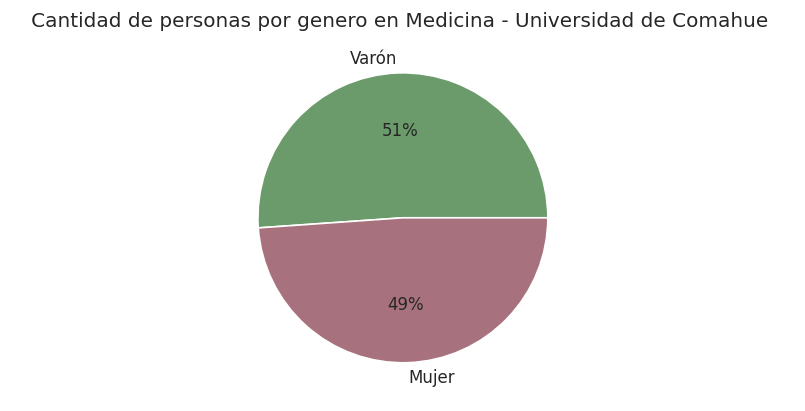

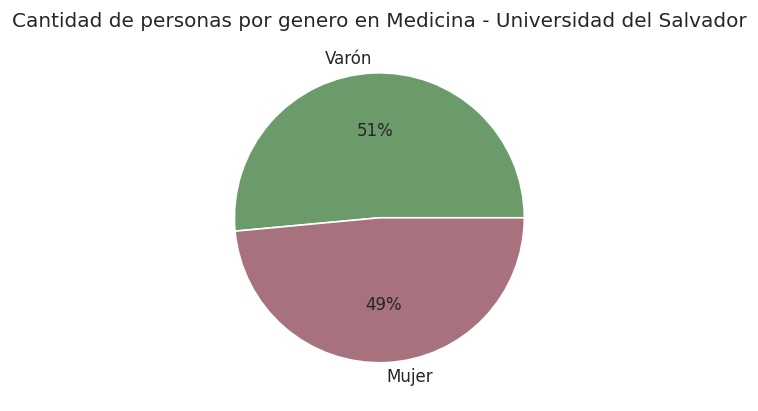

In [40]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()
